In [1]:
include("..//src//CepstralClustering.jl")
using YFinance
using Plots
using Plots.PlotMeasures

In [2]:
ncp = 10
p = 2
k = 4

4

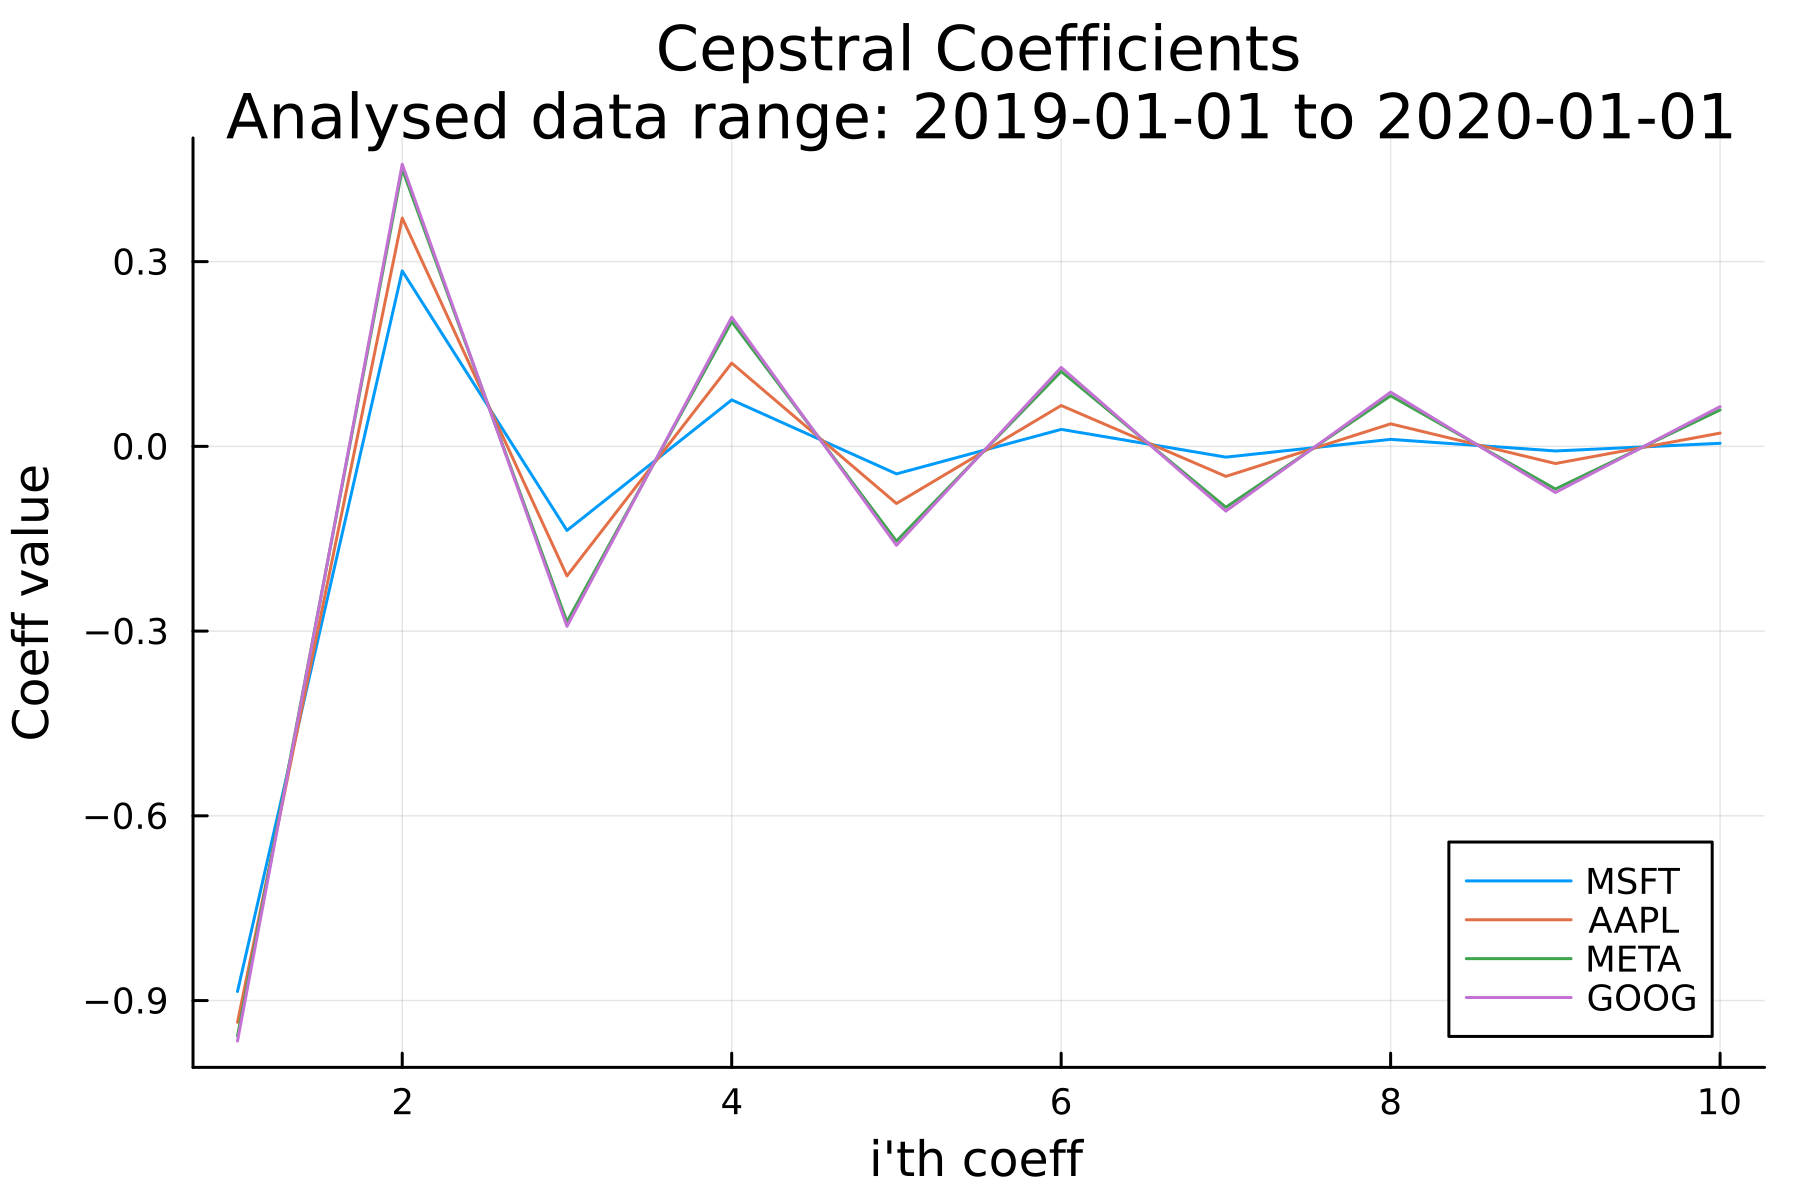

In [3]:
tickers = ["MSFT", "AAPL", "META", "GOOG"]
startdt = "2019-01-01"
enddt = "2020-01-01"
querry = [get_prices(ticker, startdt=startdt, enddt=enddt)["adjclose"] for ticker in tickers]
prices = stack(querry, dims=1);
model = ARCepstral(p)
cepstralcoefs = cc(model, prices, ncp);
#Ploting
plot(
  cepstralcoefs,
  label=permutedims(tickers),
  title="Cepstral Coefficients\nAnalysed data range: $(startdt) to $(enddt)",
  xlabel="i'th coeff",
  ylabel="Coeff value",
  legend=:bottomright,
  dpi=300,
)
# savefig("CepstralCoefs.png")

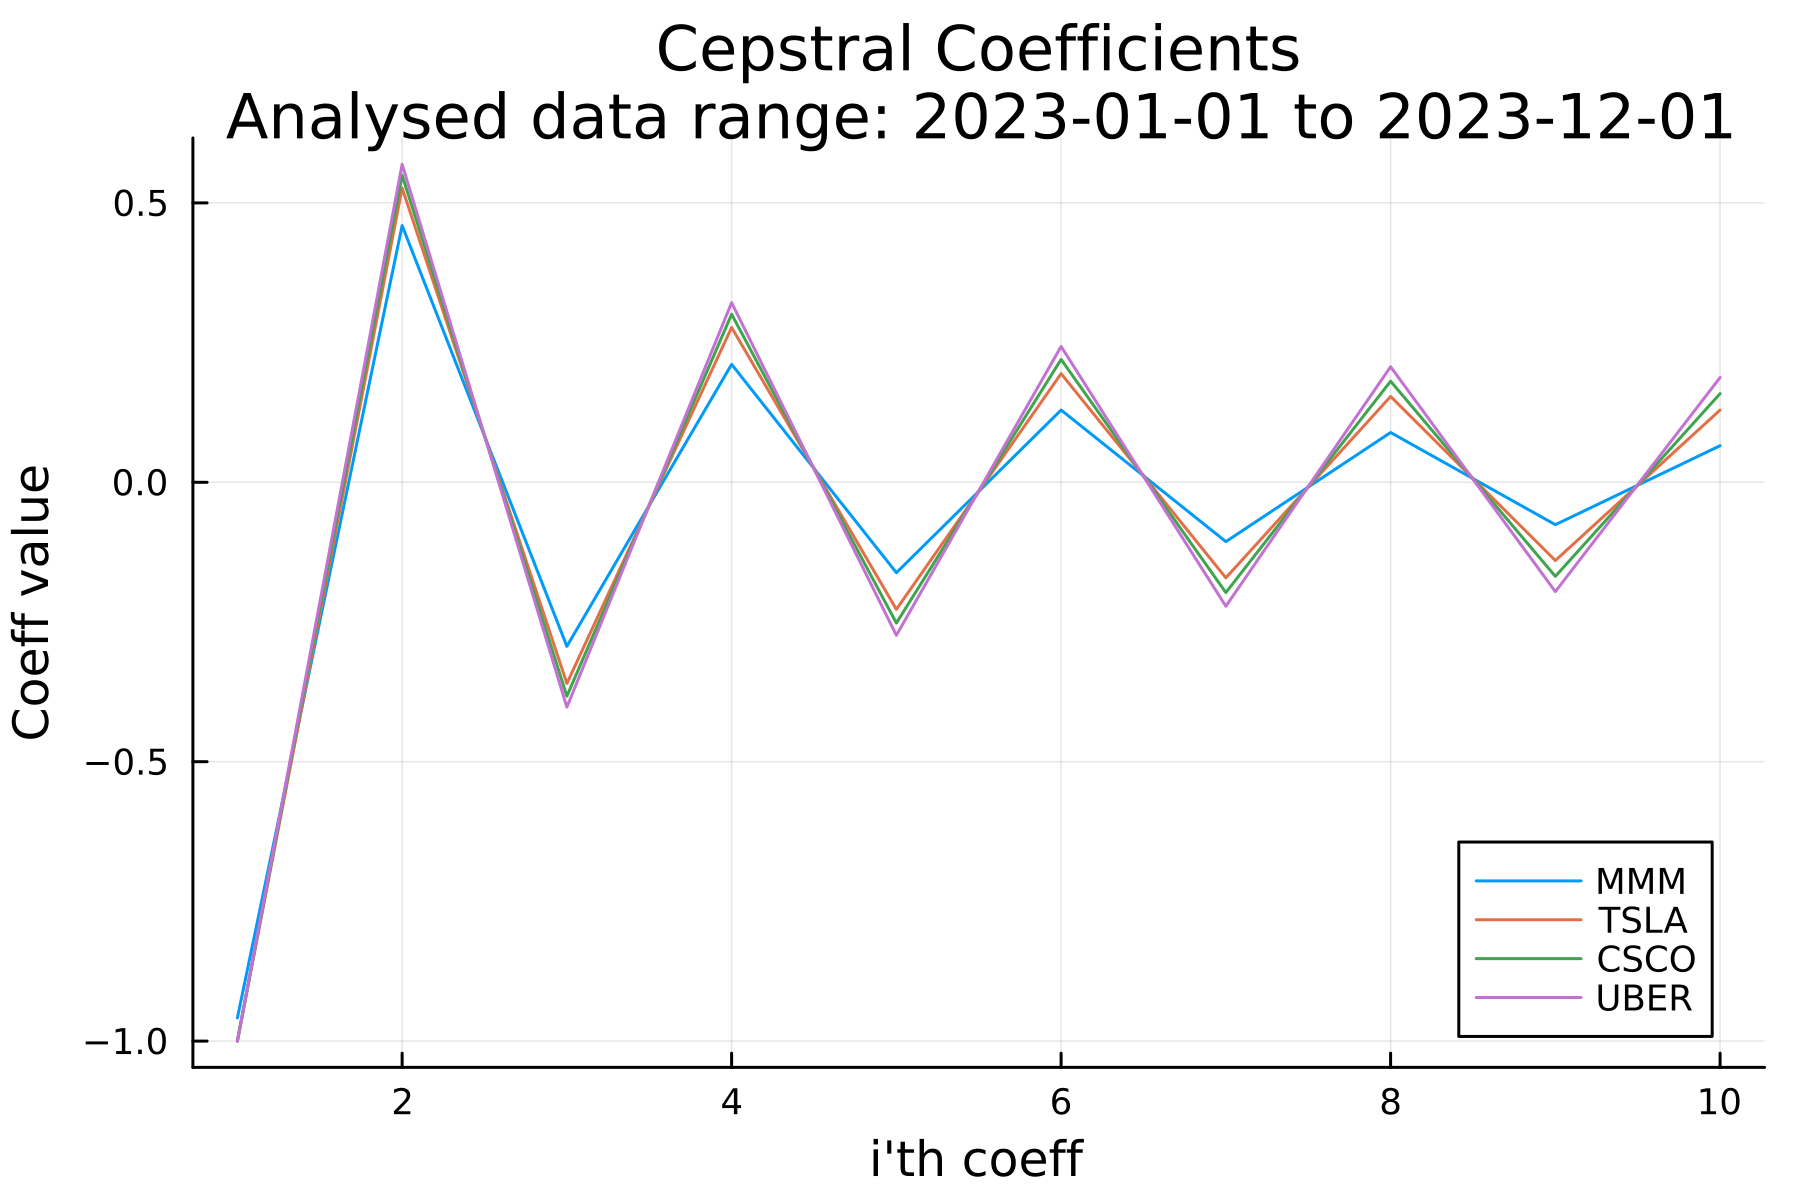

In [4]:
tickers = ["MMM", "TSLA", "CSCO", "UBER"]
startdt = "2023-01-01"
enddt = "2023-12-01"
querry = [get_prices(ticker, startdt=startdt, enddt=enddt)["adjclose"] for ticker in tickers]
prices = stack(querry, dims=1);
model = ARCepstral(p)
cepstralcoefs = cc(model, prices, ncp);
#Ploting
plot(
  cepstralcoefs,
  label=permutedims(tickers),
  title="Cepstral Coefficients\nAnalysed data range: $(startdt) to $(enddt)",
  xlabel="i'th coeff",
  ylabel="Coeff value",
  legend=:bottomright,
  dpi=300,
)
# savefig("CepstralCoefs1.png")

In [5]:
tickers = ["MSFT", "AAPL", "GOOG", "AMZN", "META", "TSLA", "NVDA", "INTC", "CSCO", "ADBE"]
startdt = "2019-01-01"
enddt = "2020-01-01"
querry = [get_prices(ticker, startdt=startdt, enddt=enddt)["adjclose"] for ticker in tickers]
prices = stack(querry, dims=1);
model = ARCepstral(p)
cepstralcoefs = cc(model, prices, ncp);
clusters = clustering(cepstralcoefs, k)

3-element Vector{Vector{Int64}}:
 [2]
 [1, 3, 5, 7, 9]
 [4, 6, 8, 10]

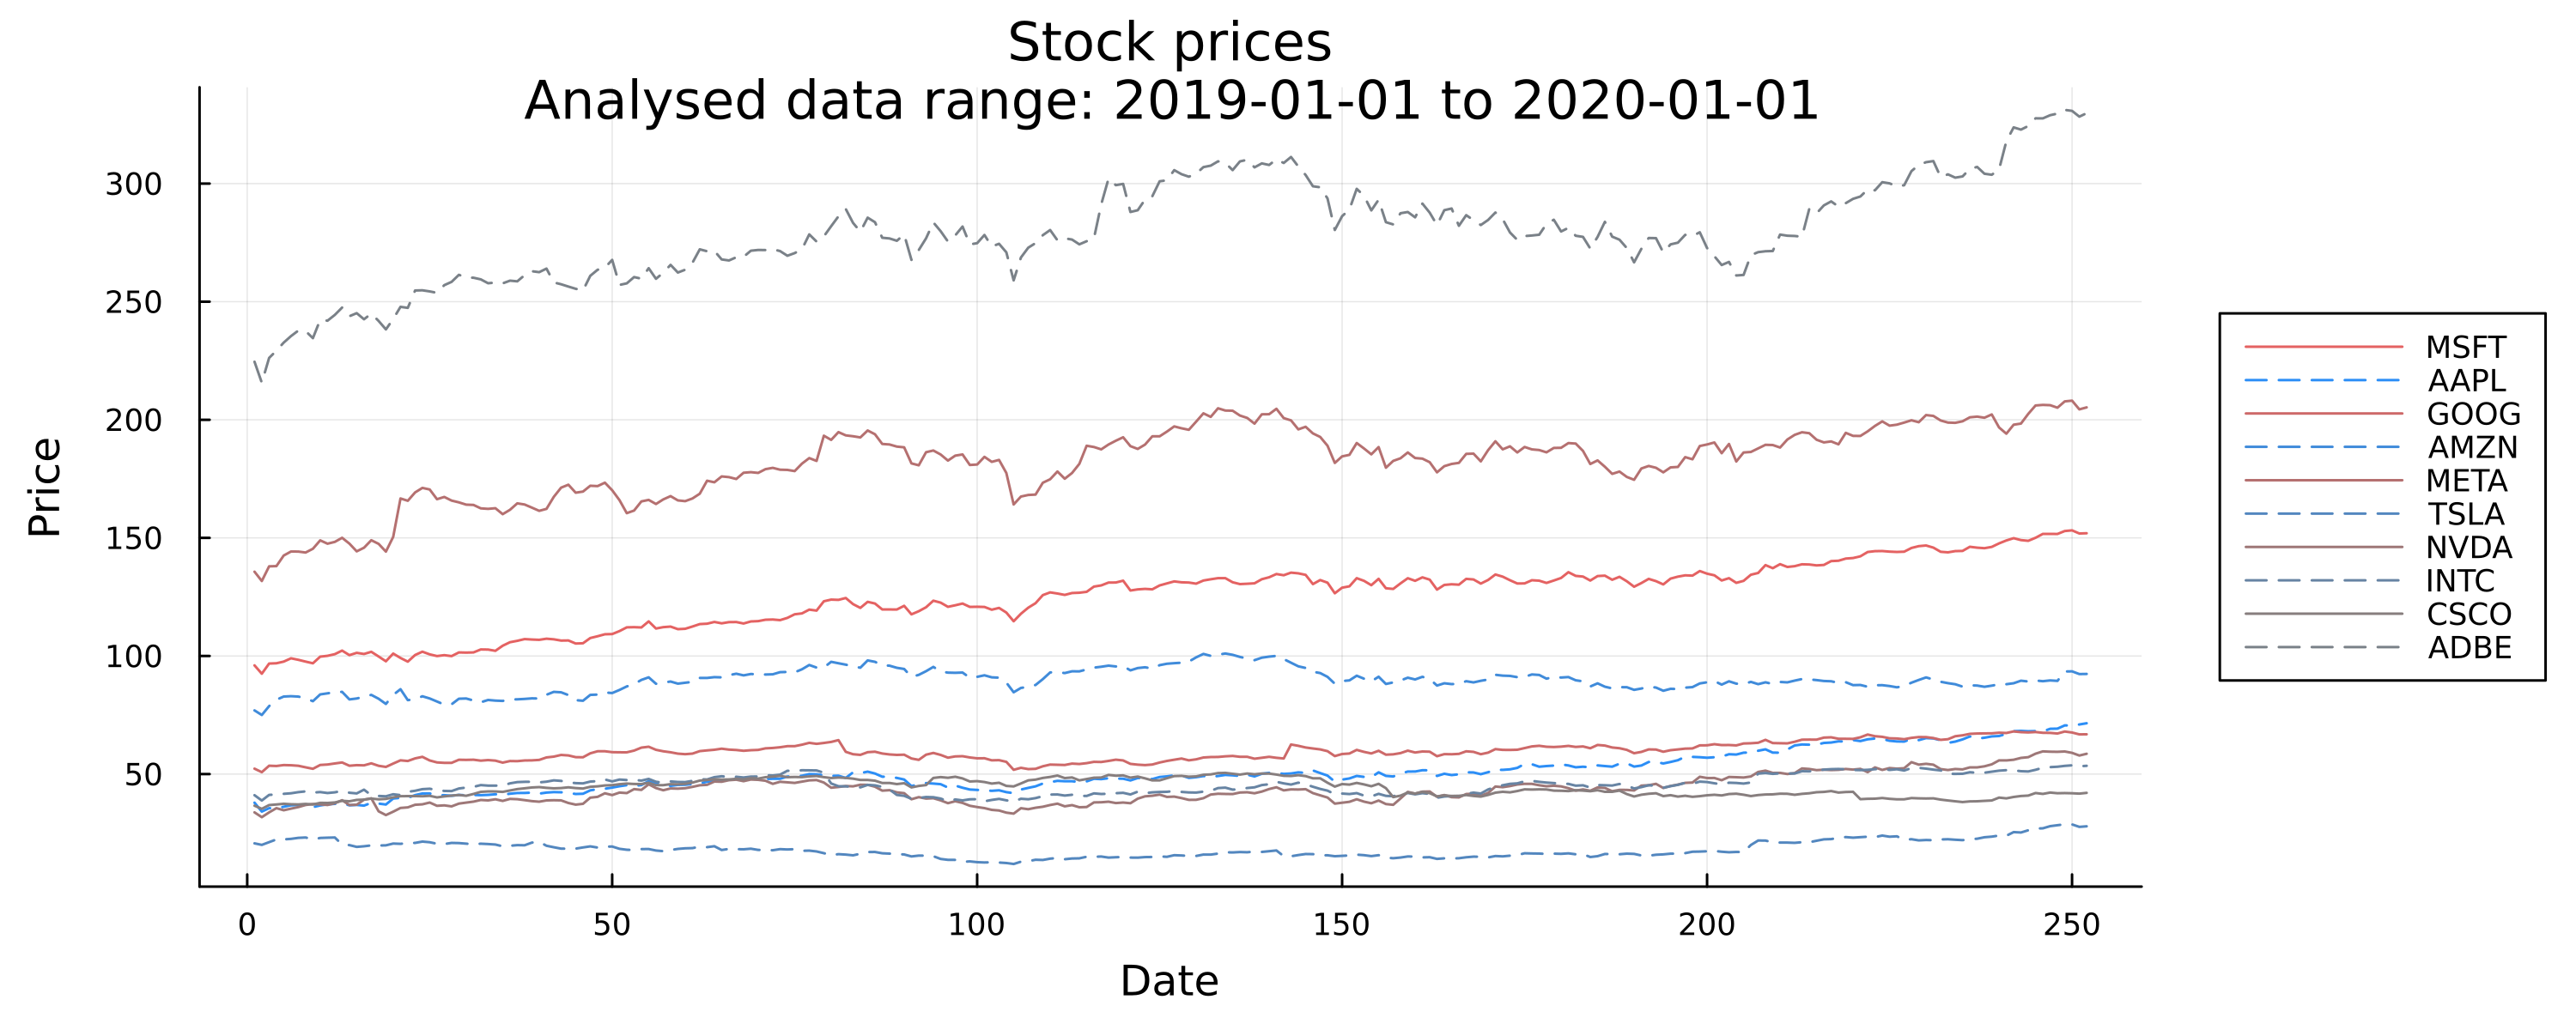

In [6]:
colortones = ["#E46262" "#2C8EF6" "#CD6969" "#408BDA" "#B57070" "#5387BF" "#9E7777" "#6784A3" "#877E7E" "#7A8188"]
linestyle = [:solid :dash :solid :dash :solid :dash :solid :dash :solid :dash]
plot(
  prices',
  label=permutedims(tickers),
  title="Stock prices\nAnalysed data range: $(startdt) to $(enddt)",
  xlabel="Date",
  ylabel="Price",
  legend=:outerright,
  dpi=300,
  color=colortones,
  size=(1000, 400),
  linestyle=linestyle,
  bottom_margin=6mm,
  left_margin=6mm,
)

In [7]:
savefig("StockPrices.png")

"e:\\Julia Forks\\TimeSeries-Cepstral-Clustering\\example\\StockPrices.png"

In [8]:
series2010 = get_prices("INTC", startdt="2010-10-19", enddt="2011-03-17")["adjclose"];
series2011 = get_prices("INTC", startdt="2011-04-19", enddt="2011-08-09")["adjclose"];
series2009 = get_prices("INTC", startdt="2009-03-05", enddt="2009-07-02")["adjclose"];

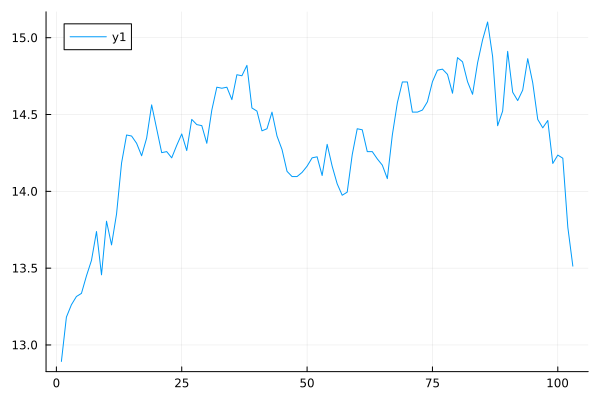

In [9]:
plot(series2010)

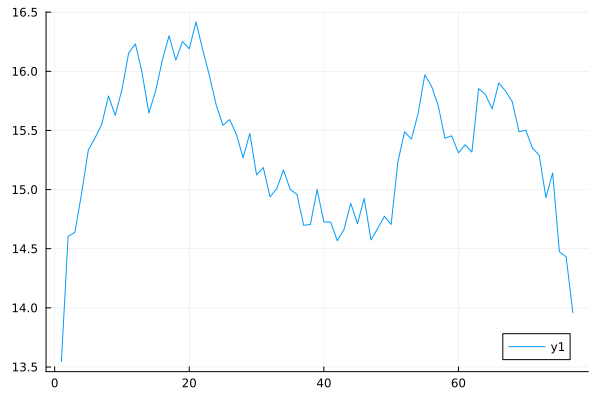

In [10]:
plot(series2011)

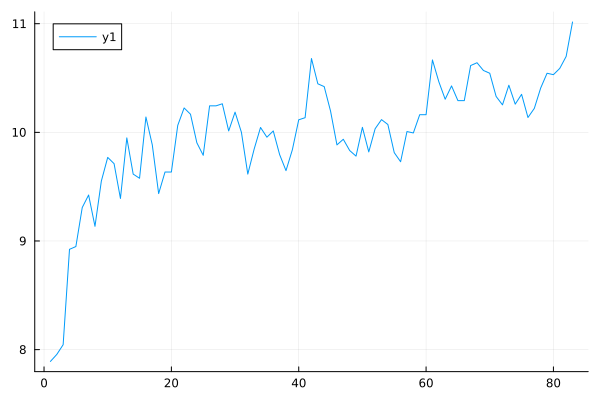

In [11]:
plot(series2009)

In [12]:
cc2010 = cc(RealCepstral(), series2010, 5)
cc2011 = cc(RealCepstral(), series2011, 5)
cc2009 = cc(RealCepstral(), series2009, 5)

5-element Vector{Float64}:
 1.1954455768422514
 0.45114972725844066
 0.20357724918802855
 0.029169140894928707
 0.13890446884614385

In [13]:
euc(v1, v2) = (v1.-v2).^2 |> sum |> sqrt
euc(cc2010, cc2011)

0.42639674649881976

In [14]:
euc(cc2009, cc2011)


0.5921657792584087

In [15]:
euc(cc2009, cc2010)

0.8932695940898042

In [16]:
m2010 = ARCepstral(1)
m2011 = ARCepstral(1)
m2009 = ARCepstral(1)
cc2010 = cc(m2010, series2010, 5)
cc2011 = cc(m2011, series2011, 5)
cc2009 = cc(m2009, series2009, 5)

5-element Vector{Float64}:
 -0.8303816331955592
  0.34476682837426215
 -0.19085869467804858
  0.11886416594724794
 -0.078962096198163

In [17]:
euc(cc2010, cc2011)

0.039520771114325844

In [18]:
euc(cc2009, cc2011)


0.054944884453547414

In [19]:
euc(cc2009, cc2010)

0.09444497854162533